In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
image_side_dimension = 28
h_dim_gen = 256
h_dim_disc = 256
learning_rate = 0.001

In [7]:
xavier_init = tf.contrib.layers.xavier_initializer()

In [8]:
#Discriminator netowrk
X = tf.placeholder(tf.float32, shape=[None, 28 * 28], name='X')
D_W1 = tf.Variable(xavier_init([28*28, h_dim_disc]), name='D_W1')
D_b1 = tf.Variable(tf.zeros(shape=[h_dim_disc]), name='D_b1')
D_W2 = tf.Variable(xavier_init([h_dim_disc, 1]), name='D_W2')
D_b2 = tf.Variable(tf.zeros(shape=[1]), name='D_b2')

In [9]:
D_theta = [D_W1, D_b1, D_W2, D_b2]

In [10]:
#Generator network
Z = tf.placeholder(tf.float32, shape=[None, 100], name='Z')
G_W1 = tf.Variable(xavier_init([100, h_dim_gen]), name='G_W1')
G_b1 = tf.Variable(tf.zeros(shape=[h_dim_gen]), name='G_b1')
G_W2 = tf.Variable(xavier_init([h_dim_gen, 28 * 28]), name='G_W2')
G_b2 = tf.Variable(tf.zeros(shape=[28 * 28]), name='G_b2')
    

In [11]:
G_theta = [G_W1, G_b1, G_W2, G_b2]

In [12]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.sigmoid(D_logit)
    
    return D_prob, D_logit

In [13]:
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_logit = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.sigmoid(G_logit)
    
    return G_prob

In [14]:
def sample_Z(m, n):
    return np.random.uniform(-1.0, 1.0, size=[m, n])

In [15]:
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

In [16]:
D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1.0 - D_fake))
G_loss = -tf.reduce_mean(tf.log(D_fake))

In [17]:
D_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list=D_theta)
G_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list=G_theta)

In [18]:
num_iters = 10000
minibatch_size = 128
Z_dim = 100

In [19]:
session = tf.Session()
session.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [26]:
import os
if not os.path.exists('out/'):
    os.makedirs('out/')

In [27]:
i = 0
from matplotlib.pyplot import *

Minibatch G loss at step 0: 3.981125


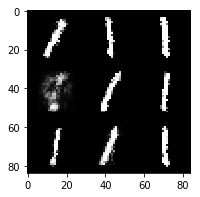

Minibatch G loss at step 200: 3.661780
Minibatch G loss at step 400: 3.638699
Minibatch G loss at step 600: 3.414130
Minibatch G loss at step 800: 4.633463
Minibatch G loss at step 1000: 3.180403


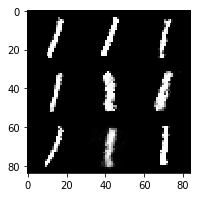

Minibatch G loss at step 1200: 3.640614
Minibatch G loss at step 1400: 3.533760
Minibatch G loss at step 1600: 3.100392
Minibatch G loss at step 1800: 3.299725
Minibatch G loss at step 2000: 3.456001


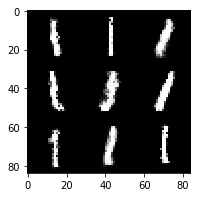

Minibatch G loss at step 2200: 3.858307
Minibatch G loss at step 2400: 2.784520
Minibatch G loss at step 2600: 2.912382
Minibatch G loss at step 2800: 3.333266
Minibatch G loss at step 3000: 3.477135


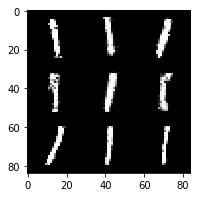

Minibatch G loss at step 3200: 3.061664
Minibatch G loss at step 3400: 2.580945
Minibatch G loss at step 3600: 3.216425
Minibatch G loss at step 3800: 2.820542
Minibatch G loss at step 4000: 3.315196


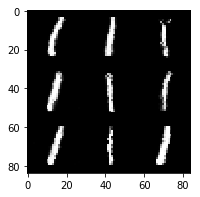

Minibatch G loss at step 4200: 3.730651
Minibatch G loss at step 4400: 3.840415
Minibatch G loss at step 4600: 3.388138
Minibatch G loss at step 4800: 3.080813
Minibatch G loss at step 5000: 4.053866


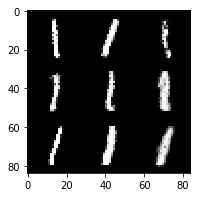

Minibatch G loss at step 5200: 2.884482
Minibatch G loss at step 5400: 3.373634


KeyboardInterrupt: 

In [29]:
for iter in range(num_iters):
    X_batch, _ = mnist.train.next_batch(minibatch_size)
    Z_sample = sample_Z(minibatch_size, 100)
    _, D_loss_curr = session.run([D_optimizer, D_loss], feed_dict={X: X_batch, Z: Z_sample})
    _, G_loss_curr = session.run([G_optimizer, G_loss], feed_dict={Z: Z_sample})
    
    if (iter%200) == 0:
#         print("Minibatch D loss at step %d: %f" % (iter, D_loss_curr))
        print("Minibatch G loss at step %d: %f" % (iter, G_loss_curr))
    

    if (iter%1000) == 0:
        n = 3
        canvas = np.empty((28 * n, 28 * n))
        for i in range(n):
            Z_test_sample = sample_Z(n, 100)
            G_test_sample = session.run(G_sample, feed_dict={Z: Z_test_sample})
            
            G_test_sample = np.multiply((G_test_sample - 1.0), 1.0)
            for j in range(n):
                canvas[i*image_side_dimension:(i+1)*image_side_dimension, j*image_side_dimension:(j+1)*image_side_dimension] = G_test_sample[j].reshape([image_side_dimension, image_side_dimension])
        
        plt.figure(figsize=(n, n))
        plt.imshow(canvas, origin="upper", cmap="gray")
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        plt.show()